# Project: 데이터분석전문가(ADP) 실기시험
#### Summary: 코드북 - 머신러닝

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

## 전처리

#### 이상치(Outlier) 확인 및 처리 - IQR 기법

In [ ]:
import numpy as np

numeric_columns = df._get_numeric_data().columns

def outlier_detection(df, col):
    q1, q3 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    outlier = df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col} 변수 이상치 개수: {len(outlier)}개")
        
        
def outlier_process(df, col):
    q1, q3 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    
    outlier = df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} 변수 이상치 {len(outlier)}개 처리")
    
    df = df.loc[df[col] < lower_bound, col] = lower_bound
    df = df.loc[df[col] > upper_bound, col] = upper_bound
    
    return df

## 회귀분석 기본 프로세스
1. 데이터 분할
2. 모델 적용 & GridSearchCV를 통한 파라미터 최적화
3. 결정계수 및 RMSE 구하기

In [24]:
import pandas as pd
import numpy as np
import mglearn

# 데이터 불러오기
X, y = mglearn.datasets.load_extended_boston()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 데이터 7:3 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 선형회귀(Linear regression)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# print(f"선형회귀 변수별 계수: {lr.coef_}")
print(f"선형회귀 결정계수: {lr.score(X_test, y_test)}")
print(f"선형회귀 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print("-" * 130)


# Ridge 회귀(Ridge regression):
# 파라미터 search-space (예) alpha값 0부터 1까지 0.1 단위로
params = {
    'alpha' : np.arange(0, 1.1, 0.1)
}

ridge = GridSearchCV(Ridge(random_state=42), params)
ridge.fit(X_train, y_train)
alpha = ridge.best_params_

print(f"Ridge 최적 alpha: {alpha}")

# 최적 alpha 값으로 학습한 모델
ridge = ridge.best_estimator_
y_pred = ridge.predict(X_test)

# print(f"Ridge 변수별 계수: {ridge.coef_}")
print(f"Ridge 결정계수: {ridge.score(X_test, y_test)}")
print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print("-" * 130)


# Lasso 회귀(Lasso Regression)
# 파라미터 search-space (예) alpha값 0부터 1까지 0.1 단위로
params = {
    'alpha' : np.arange(0, 1.1, 0.1)
}

lasso = GridSearchCV(Lasso(random_state=42), params)
lasso.fit(X_train, y_train)
alpha = lasso.best_params_

print(f"Lasso 최적 alpha: {alpha}")

# 최적 alpha 값으로 학습한 모델
lasso = lasso.best_estimator_
y_pred = lasso.predict(X_test)

# print(f"Lasso 변수별 계수: {lasso.coef_}")
print(f"Lasso 결정계수: {lasso.score(X_test, y_test)}")
print(f"Lasso RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

선형회귀 결정계수: 0.6610321968877293
선형회귀 RMSE: 5.025688043217024
----------------------------------------------------------------------------------------------------------------------------------
Ridge 최적 alpha: {'alpha': 0.1}
Ridge 결정계수: 0.8355846906162807
Ridge RMSE: 3.5001562337886427
----------------------------------------------------------------------------------------------------------------------------------
Lasso 최적 alpha: {'alpha': 0.0}
Lasso 결정계수: 0.6591444264036643
Lasso RMSE: 5.039663077054247


## 데이터 불균형 문제 처리: 언더샘플링 / 오버샘플링

In [15]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter

X, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)

print(Counter(y))

Counter({0: 1900, 1: 100})


### 언더샘플링
- 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소시키는 기법이다.
- 이 기법을 사용하면 데이터 불균형으로 인한 문제는 피할 수 있지만 전체 데이터의 수가 급격하게 줄어들어 오히려 학습 성능을 떨어뜨리는 결과를 초래할 수 있다.

#### Random Under Sampling
- 랜덤 언더 샘플링은 다수를 차지하는 레이블에서 무작위로 데이터를 제거하는 방법이다.

```python
    from imblearn.under_sampling import RandomUnderSampler
    
    under_sampler = RandomUnderSampler(sampling_strategy='majority') # 소수 레이블과 1:1로 샘플링할 경우
    under_sampler = RandomUnderSampler(sampling_strategy=0.5) # 소수 레이블의 비율을 0.5로 샘플링할 경우
    
    X_under_sample, y_under_sample = under_sampler.fit_resample(X, y)    
```

- **`sampling_strategy`** 파라미터를 **`majority`**로 지정하면 다수 레이블의 데이터를 샘플링하여 소수 레이블의 데이터 수와 동일하게 줄인다.

In [16]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy='majority')
X_under_sample, y_under_sample = under_sampler.fit_resample(X, y)

Counter(y_under_sample)

Counter({0: 100, 1: 100})

- **`sampling_strategy`** 파라미터를 **`0에서 1사이의 숫자 값`**을 지정하면 소수 레이블의 데이터 수와 다수 레이블의 데이터 수가 해당 비율이 되도록 조정한다.

In [17]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy=0.5)
X_under_sample_weight, y_under_sample_weight = under_sampler.fit_resample(X, y)

Counter(y_under_sample_weight)

Counter({0: 200, 1: 100})

### 오버샘플링
- 소수의 레이블을 지닌 데이터 세트를 다수 레이블을 지닌 데이터 세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다.
- 데이터의 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용된다.

#### Random Over Sampling
- 랜덤 오버 샘플링은 소수의 레이블을 지닌 데이터 세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다.
- 데이터를 단순 복제하기 때문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있다.
- 오버피팅의 위험성이 있지만 불균형 문제를 처리하지 않는 것보다는 유효하기 때문에 종종 사용된다.

```python
    from imblearn.over_sampling import RandomoverSampler
    
    over_sampler = RandomoverSampler(sampling_strategy='minority') # 다수 레이블과 1:1로 복제할 경우
    over_sampler = RandomoverSampler(sampling_strategy=0.5) # 소수 레이블의 비율을 0.5로 샘플링할 경우
    
    X_over_sample, y_over_sample = over_sampler.fit_resample(X, y)    
```

In [20]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy='minority')
X_over_sample, y_over_sample = over_sampler.fit_resample(X, y)

Counter(y_over_sample)

Counter({0: 1900, 1: 1900})

In [21]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy=0.5)
X_over_sample_weight, y_over_sample_weight = over_sampler.fit_resample(X, y)

Counter(y_over_sample_weight)

Counter({0: 1900, 1: 950})

#### SMOTE(Synthetic Minority Over-sampling Technique)
- 소수 레이블을 지닌 데이터 세트의 관측 값에 대한 K개의 최근접 이웃(K-Nearest Neighbor)을 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법이다.

```python
    from imblearn.over_sampling import SMOTE
    
    smote_sampler = SMOTE(sampling_strategy='minority') # 다수 레이블과 1:1로 복제할 경우
    smote_sampler = SMOTE(sampling_strategy=0.5) # 소수 레이블의 비율을 0.5로 샘플링할 경우
    
    X_over_sample, y_over_sample = over_sampler.fit_resample(X, y)    
```

In [24]:
from imblearn.over_sampling import SMOTE

smote_sampler = SMOTE(sampling_strategy='minority')
X_smote_sample, y_smote_sample = smote_sampler.fit_resample(X, y)

Counter(y_smote_sample)

Counter({0: 1900, 1: 1900})

In [25]:
from imblearn.over_sampling import SMOTE

smote_sampler = SMOTE(sampling_strategy=0.5)
X_smote_sample_weight, y_smote_sample_weight = smote_sampler.fit_resample(X, y)

Counter(y_smote_sample_weight)

Counter({0: 1900, 1: 950})

#### 시각화
- Original Data 그래프에서는 원본 데이터에서 0과 1 레이블의 개수가 크게 차이 나는 것을 확인할 수 있다.
- Random Under Sampling의 결과를 보면 0번 레이블의 수가 1번 레이블의 수와 동일한 수준으로 줄어든 것을 확인할 수 있다.
- Random Over Sampling은 데이터를 단순 복제하여 1번 레이블의 관측값들의 위치가 원본 데이터와 차이가 없다.
- SMOTE는 원본 데이터와 다른 1번 레이블 데이터를 만들어냈다.

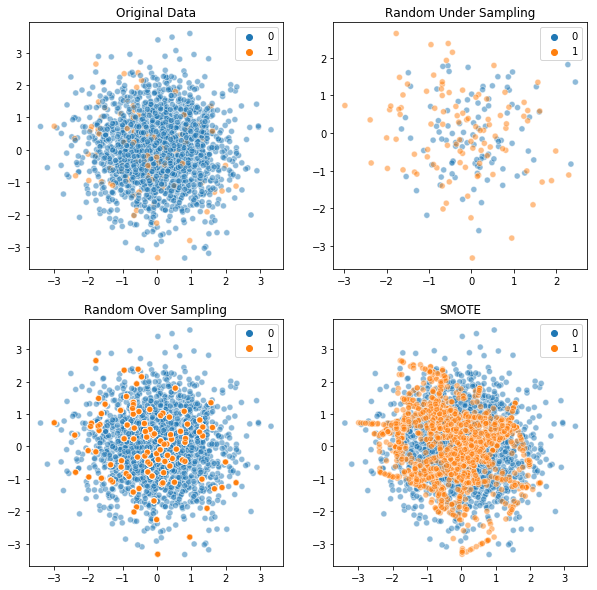

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.scatterplot(X[:, 1], X[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(X_under_sample[:, 1], X_under_sample[:, 2], hue=y_under_sample, ax=axes[0][1], alpha=0.5)
sns.scatterplot(X_over_sample[:, 1],  X_over_sample[:, 2],  hue=y_over_sample,  ax=axes[1][0], alpha=0.5)
sns.scatterplot(X_smote_sample[:, 1], X_smote_sample[:, 2], hue=y_smote_sample, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title("Original Data")
axes[0][1].set_title("Random Under Sampling")
axes[1][0].set_title("Random Over Sampling")
axes[1][1].set_title("SMOTE")

plt.show()